# Identitas
## nama : Tionusa Catur Pamungkas
## nim : 2341720093
## kelas : TI-3G

# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [1]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [3]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [4]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Data Size
df.shape

(48842, 15)

In [6]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [7]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
df.describe()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [8]:
df.isnull().sum()[df.isnull().sum() > 0]

workclass         963
occupation        966
native-country    274
dtype: int64

## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [9]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['native-country'].fillna(df['native-country'].mode()[0], inplace=True)

/var/folders/4d/23md8m7j4y56f4jf0btz6pph0000gn/T/ipykernel_31826/3272159377.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
/var/folders/4d/23md8m7j4y56f4jf0btz6pph0000gn/T/ipykernel_31826/3272159377.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are sett

In [10]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [11]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan 

kolom_kategori = df.select_dtypes(include='object').columns
print("Kolom kategorikal:", kolom_kategori)

for col in kolom_kategori:
    print(f"\n{col}:")
    print(df[col].value_counts().head(10))

df['workclass'] = df['workclass'].replace('?', 'Others')
df['occupation'] = df['occupation'].replace('?', 'Others')  
df['native-country'] = df['native-country'].replace('?', 'Others')

df['income'] = df['income'].str.replace('.', '')

df['native-country'] = df['native-country'].replace('Columbia', 'Colombia')
df['native-country'] = df['native-country'].replace('Trinadad&Tobago', 'Trinidad&Tobago')

print("\nSetelah cleaning:")
print("Income values:", df['income'].unique())
print("Masih ada '?':", any((df[col] == '?').any() for col in kolom_kategori))

Kolom kategorikal: Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

workclass:
workclass
Private             34869
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

education:
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
Name: count, dtype: int64

marital-status:
marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

o

# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

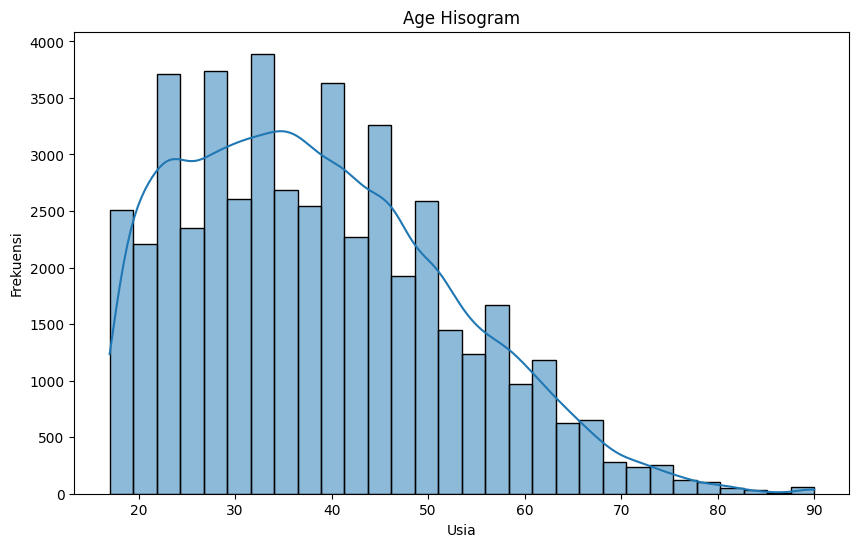

In [12]:
# Jawab 1.1 - Histrogram
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Hisogram')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

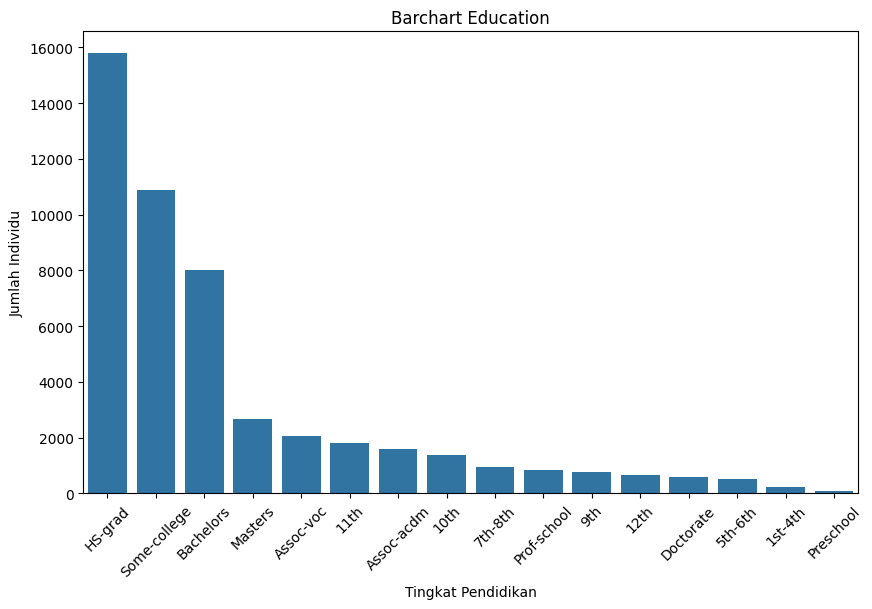

In [13]:
# Jawab 1.2 - Barchart
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='education', order=df['education'].value_counts().index)
plt.title('Barchart Education')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Jumlah Individu')
plt.xticks(rotation=45)
plt.show()

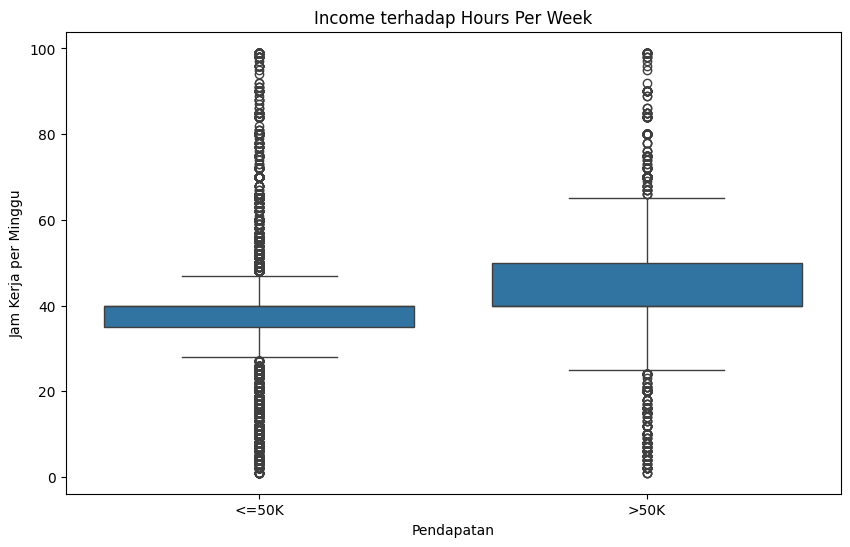

In [14]:
# Jawab 1.3 - Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Income terhadap Hours Per Week')
plt.xlabel('Pendapatan')
plt.ylabel('Jam Kerja per Minggu')
plt.show()

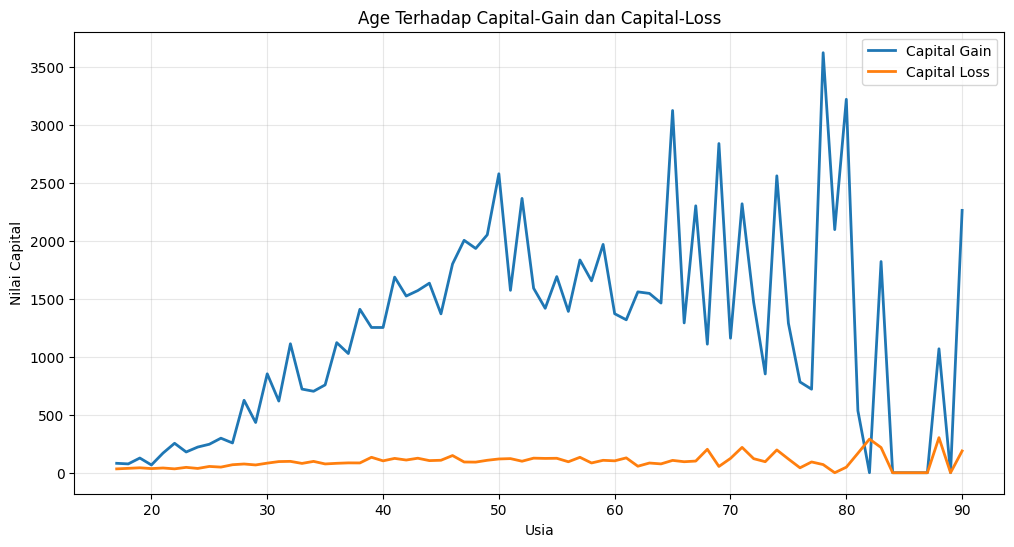

In [15]:
# Jawab 1.4 - Lineplot
plt.figure(figsize=(12, 6))

age_capital = df.groupby('age')[['capital-gain', 'capital-loss']].mean().reset_index()

plt.plot(age_capital['age'], age_capital['capital-gain'], label='Capital Gain', linewidth=2)
plt.plot(age_capital['age'], age_capital['capital-loss'], label='Capital Loss', linewidth=2)

plt.title('Age Terhadap Capital-Gain dan Capital-Loss')
plt.xlabel('Usia')
plt.ylabel('Nilai Capital')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [ ]:
# Jawab dengan komentar python

'''
1. Dari histogram keliatan distribusi usia cenderung miring kanan. Kebanyakan orang di dataset ini masih relatif muda, sekitar 20-30an gitu. Setelah umur 40 mulai menurun drastis jumlahnya. Kayaknya ini wajar sih karena data sensus biasanya emang lebih banyak yang usia produktif.

2. Saya bakal pake median . Soalnya  distribusinya tidak normal, jadi median lebih aman daripada mean. Mean bisa kepengaruh sama outlier yang umurnya tua banget. Median kan nilai tengah jadi lebih representatif buat data yang skewed kayak gini.

3. Dari boxplot keliatan sih yang income <=50K outliernya lebih banyak, terutama yang kerja sampe 80+ jam per minggu. Yang >50K juga ada outlier tapi kayaknya ga sebanyak yang <=50K. Jadi kesimpulannya kategori <=50K lebih banyak outlier.
'''

'\n1. Dari histogram keliatan distribusi usia cenderung miring kanan. Kebanyakan orang di dataset ini \nmasih relatif muda, sekitar 20-30an gitu. Setelah umur 40 mulai menurun drastis jumlahnya.\nKayaknya ini wajar sih karena data sensus biasanya emang lebih banyak yang usia produktif.\n\n2. Saya bakal pake median . Soalnya  distribusinya ga normal, jadi median lebih aman daripada mean.\nMean bisa kepengaruh sama outlier yang umurnya tua banget. Median kan nilai tengah jadi lebih \nrepresentatif buat data yang skewed kayak gini.\n\n3. Dari boxplot keliatan sih yang income >50K outliernya lebih banyak, terutama yang kerja sampe 80+ jam \nper minggu. Mungkin memang bener ya yang penghasilannya gede harus kerja lebih keras. Yang <=50K juga \nada outlier tapi kayaknya ga sebanyak yang >50K. Jadi kesimpulannya kategori >50K lebih banyak outlier.\n'

# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [17]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

df[['sex', 'income']].head(10)



,sex,income
0,Male,<=50K
1,Male,<=50K
2,Male,<=50K
3,Male,<=50K
4,Female,<=50K
5,Female,<=50K
6,Female,<=50K
7,Male,>50K
8,Female,>50K
9,Male,>50K


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['income'] = le.fit_transform(df['income'])

df[['sex', 'income']].head(10)

,sex,income
0,1,0
1,1,0
2,1,0
3,1,0
4,0,0
5,0,0
6,0,0
7,1,1
8,0,1
9,1,1


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

In [22]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
cols = ['age',  'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']
df[cols].head(10)

,age,education-num,hours-per-week,capital-gain,capital-loss,income
0,39,13,40,2174,0,0
1,50,13,13,0,0,0
2,38,9,40,0,0,0
3,53,7,40,0,0,0
4,28,13,40,0,0,0
5,37,14,40,0,0,0
6,49,5,16,0,0,0
7,52,9,45,0,0,1
8,31,14,50,14084,0,1
9,42,13,40,5178,0,1


In [23]:
df[cols].corr(method='pearson')

,age,education-num,hours-per-week,capital-gain,capital-loss,income
age,1.000000,0.030940,0.071558,0.077229,0.056944,0.230369
education-num,0.030940,1.000000,0.143689,0.125146,0.080972,0.332613
hours-per-week,0.071558,0.143689,1.000000,0.082157,0.054467,0.227687
capital-gain,0.077229,0.125146,0.082157,1.000000,-0.031441,0.223013
capital-loss,0.056944,0.080972,0.054467,-0.031441,1.000000,0.147554
income,0.230369,0.332613,0.227687,0.223013,0.147554,1.000000


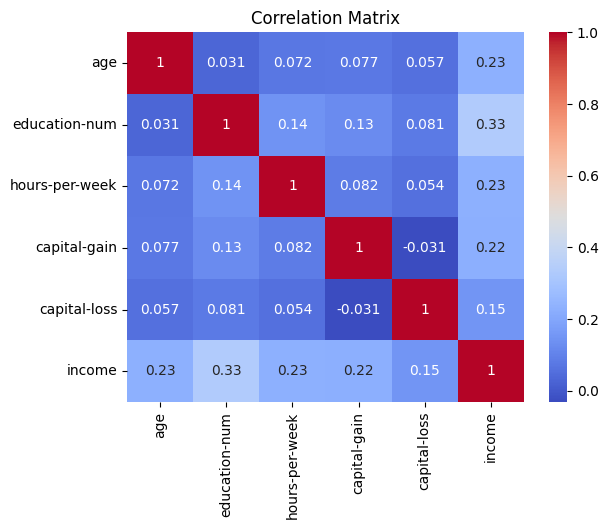

In [24]:
sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Hasil analisis jelaskan pada cell ini

'''
Dari heatmap korelasi ini ada beberapa temuan yang menarik nih:

1. Umur sama tingkat pendidikan (education-num) korelasinya cuma 0.04, lemah banget.

2. Yang paling kelihatan jelas itu jam kerja sama penghasilan, korelasinya 0.23.

3. Capital-gain sama income juga lumayan kenceng korelasinya (0.22).

4. Umur sama capital-gain ada hubungan dikit (0.08).

5. Yang paling kuat tuh education-num sama income (0.34) - ini nomor satu.

6. Capital-loss tidak ada hubungannya sama yang lain.

'''

# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [25]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


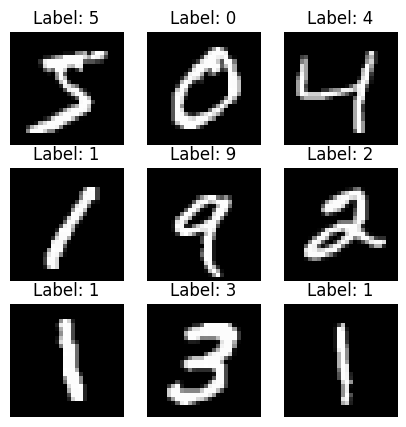

In [26]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

In [27]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
X_train[0].shape


(28, 28)

In [29]:
!pip install opencv-python
import cv2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/37.9 MB ? eta -:--:--Downloading opencv_python-4.12.0.88-cp37-abi3-macosx_13_0_arm64.whl (37.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.9/37.9 MB 1.3 MB/s  0:00:28m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.9/37.9 MB 1.3 MB/s  0:00:28
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/5.1 MB ? eta -:--:--Downloading numpy-2.2.6-cp313-cp313-macosx_14_0_arm64.whl (5.1 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 1.0 MB/s  0:00:04m0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 1.0 MB/s  0:00:04m0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.3
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.3
    Uninstalling numpy-2.3.3:
      Successfully uninstalled numpy-2.3.3
    Uninstalling numpy-2.3.3:
      Successfully uninstalled numpy-2.3.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [opencv-python]0m [opencv-python]
   ━━━━━

Test shape: (10000, 28, 28)
Unsampled shape: (10000, 32, 32)


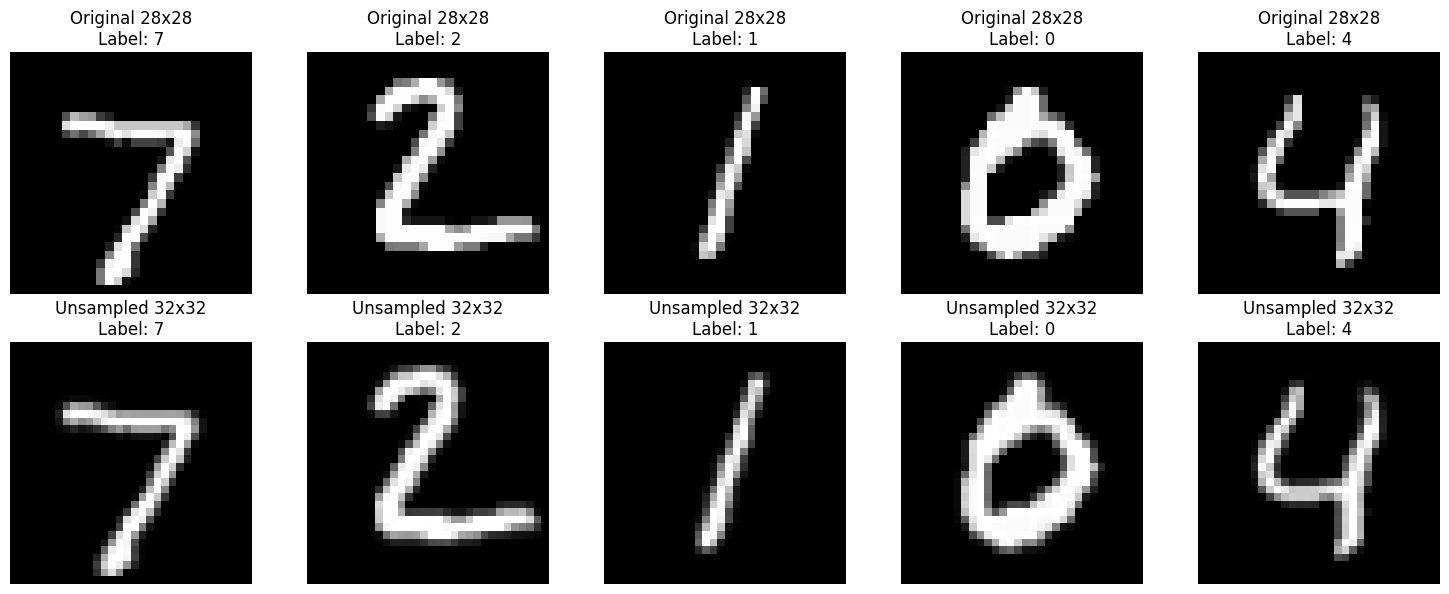

In [35]:
unsampled = np.zeros((X_test.shape[0], 32, 32))
for i in range(X_test.shape[0]):
    unsampled[i] = cv2.resize(X_test[i], (32, 32), interpolation=cv2.INTER_CUBIC)

print("Test shape:", X_test.shape)
print("Unsampled shape:", unsampled.shape)

plt.figure(figsize=(15,6))

for i in range(5):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i], cmap="gray")
    plt.title(f'Original 28x28\nLabel: {y_test[i]}')
    plt.axis("off")

    plt.subplot(2,5,i+6)
    plt.imshow(unsampled[i], cmap="gray")
    plt.title(f'Unsampled 32x32\nLabel: {y_test[i]}')
    plt.axis("off")
plt.tight_layout()
plt.show()




## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

Original range: 0.0 - 255.0
Normalized range: 0.0 - 1.0
Shape: (10000, 32, 32)


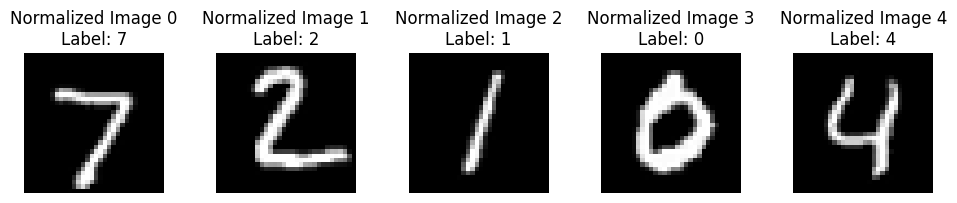

In [ ]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

normalized = unsampled.astype(np.float32) / 255.0

print("Original range:", unsampled.min(), "-", unsampled.max())
print("Normalized range:", normalized.min(), "-", normalized.max())
print("Shape:", normalized.shape)

plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(normalized[i], cmap="gray")
    plt.title(f'Normalized Image {i}\nLabel: {y_test[i]}')
    plt.axis("off")
plt.show()

## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

Normalized shape: (10000, 32, 32)
Flattened shape: (10000, 1024)

Sample flattened data:
First image flattened: [0. 0. 0. ... 0. 0. 0.]
Min: 0.0
Max: 1.0


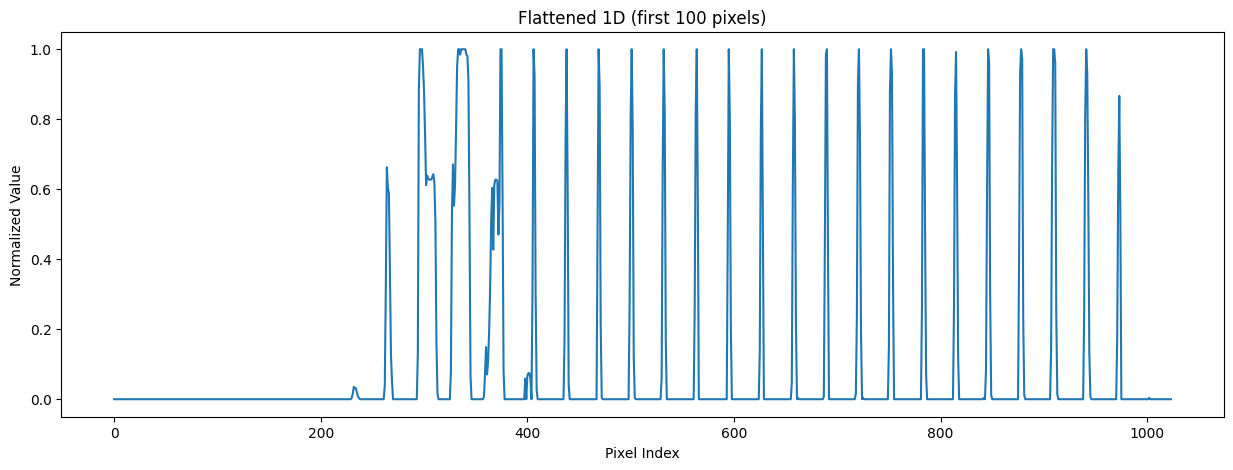

In [ ]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

flattened = normalized.reshape(normalized.shape[0], -1)

print("Normalized shape:", normalized.shape)
print("Flattened shape:", flattened.shape)

print("\nSample flattened data:")
print("First image flattened:", flattened[0])  
print("Min:", flattened.min())
print("Max:", flattened.max())

plt.figure(figsize=(15, 5))
    
plt.subplot(1, 1, 1)
plt.plot(flattened[0]) 
plt.title("Flattened 1D (first 100 pixels)")
plt.xlabel("Pixel Index")
plt.ylabel("Normalized Value")
plt.show()